In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importer le fichier potato-disease.zip depuis kaggle ici ou depuis le pc local
# !unzip potato-disease.zip
# !rm potato-disease.zip
# !mv potato-disease/ drive/MyDrive/datasets/
!ls drive/MyDrive/datasets/potato-disease

Potato___Early_blight  Potato___healthy  Potato___Late_blight


In [ ]:
import tensorflow as tf
from tensorflow import keras
models = keras.models
layers = keras.layers
import matplotlib.pyplot as plt

In [ ]:
#path of the directories that contains images for diffrent type of potatos
PATH="drive/MyDrive/datasets/potato-disease"
healthyPotatos_folder=PATH+"/Potato___healthy"
PotatoLateBlight_folder=PATH+"/Potato___Late_blight"
PotatoEarlyBlight_folder=PATH+"/Potato___Early_blight"
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3 #we have rgb pictures

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

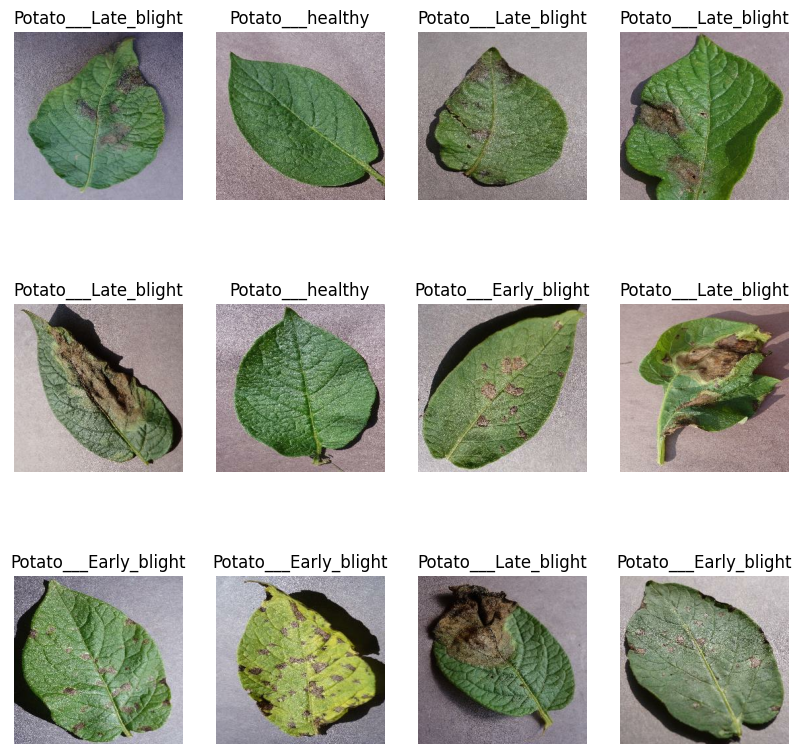

In [ ]:
# print(len(dataset))
# print(68*32)#32 batches
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
  # print("tensor = ", image_batch[0].shape)
  # print("labels for the selected images in the current batch ", label_batch.numpy())
  for i in range(12):
      f = plt.subplot(3, 4, i+1)
      # print("labels of the current image = ", label_batch[i].numpy())
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i].numpy()])
      plt.axis("off")

i'll use
80% for training

and

20% (10% validation, 10% testing)

In [ ]:
train_size = 0.8
train_size*len(dataset)

54.400000000000006

In [ ]:
training_dataset = dataset.take(54)
print(len(training_dataset))
reste_of_dataset = dataset.skip(54)
print(len(reste_of_dataset))

54
14


In [ ]:
validation_size = 0.1
print(len(dataset)*validation_size)
testing_dataset = reste_of_dataset.take(6)
validation_dataset = reste_of_dataset.skip(6)
print(len(validation_dataset))

6.800000000000001
8


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8
